The purpose of this notebook is to answer the questions put forth here:

https://docs.google.com/document/d/1Tu8-XHeOP9LHn6BmkOEHk__p1JaFNdb6jCw2UQc-vA8/edit

- Mark Halverson
- Last updated: March 09, 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from survey_utils.change_column_names import change_column_names

In [2]:
df = pd.read_csv("data/BCMT Membership Survey Anonymized Responses.csv")

In [3]:
df = change_column_names(df)

In [4]:
# print out the column names
#df.columns

# Apply some string operations to fill gaps and ensure consistency in letter cases

In [5]:
# lower case some of the responses
df["activities"] = df["activities"].str.lower()
df["primary activity"] = df["primary activity"].str.lower()
df["membership reason"] = df["membership reason"].str.lower()
df["bcmt.org use reason"] = df["bcmt.org use reason"].str.lower()
df["mobile apps used"] = df["mobile apps used"].str.lower()

In [6]:
# gap fill
print(f'Website use reason has {df["bcmt.org use reason"].isna().sum()} null values')
print(f'Mobile apps used has {df["mobile apps used"].isna().sum()} null values')
print(f'Membership reason has {df["membership reason"].isna().sum()} null values')

df["bcmt.org use reason"].fillna("no answer provided", inplace=True)
df["mobile apps used"].fillna("no answer provided", inplace=True)
df["membership reason"].fillna("no answer provided", inplace=True)

Website use reason has 23 null values
Mobile apps used has 67 null values
Membership reason has 49 null values


In [7]:
# fix up some compound words
df["membership reason"] = df["membership reason"].str.replace("camp site", "campsite", regex=False)
df["bcmt.org use reason"] = df["bcmt.org use reason"].str.replace("kajak", "kayak", regex=False)
df["mobile apps used"] = df["mobile apps used"].str.replace("garmon", "garmin", regex=False)

# Now the analysis

__Create a mask to pick out members__

In [8]:
is_member = ~df["membership duration"].str.contains("not")
print(f"{sum(is_member)} respondents report having a BCMT membership")

275 respondents report having a BCMT membership


In [9]:
# subset the data for membership
df_members = df.loc[is_member,:]
df_members.shape

(275, 21)

In [10]:
print("for how long have the members had a membership?")
df_members["membership duration"].value_counts()

for how long have the members had a membership?


2-3 years            113
1 year or less        72
4-5 years             60
More than 5 years     30
Name: membership duration, dtype: int64

__How often do the words "support" and "map" appear in the responses for why people purchased a BCMT membership?__

In [12]:
# print out 10 random reasons
#df_members["membership reason"].sample(10).to_list()

In [13]:
# count the number of times "map" occurs in the responses.
# also create a flag that selects responses containing map
n_map = df_members["membership reason"].str.count("map")
has_map = n_map >= 1

In [14]:
has_map.value_counts()

False    223
True      52
Name: membership reason, dtype: int64

In [16]:
#df_members.loc[has_map,"membership reason"].to_list()

In [17]:
n_support = df_members["membership reason"].str.count("support")
has_support = n_support >= 1

In [19]:
#df_members.loc[has_support,"membership reason"].sample(25).to_list()

In [20]:
# a few basic stats
print(f"Percentage of members mentioning \"map\": {np.round(100*sum(has_map)/df_members.shape[0],1)}%")
print(f"Percentage of members mentioning \"support\": {np.round(100*sum(has_support)/df_members.shape[0],1)}%")

Percentage of members mentioning "map": 18.9%
Percentage of members mentioning "support": 42.9%


__How often do the words map, resources, information, trip planning, ideas appear in the responses for why people use BCMT.org?__

In [24]:
#df.columns

In [25]:
#print("Example of reasons why respondents used the BCMT website")
#df["bcmt.org use reason"].sample(20).to_list()

__Create a series of masks representing which responses contain words of interest__

In [26]:
strs = ["map","resource","info","plan","idea"]

uses = pd.Series(index=strs, dtype=float)
uses.name = "percent_responses"
for str in strs:
    has_str = df["bcmt.org use reason"].str.contains(str, case=False)
    uses[str] = 100*has_str.sum()/has_str.shape[0]
    print(f'Percentage of bcmt.org uses mentioning "{str.title()}": {np.round(100*has_str.sum()/has_str.shape[0],1)}%')

Percentage of bcmt.org uses mentioning "Map": 31.7%
Percentage of bcmt.org uses mentioning "Resource": 1.2%
Percentage of bcmt.org uses mentioning "Info": 20.9%
Percentage of bcmt.org uses mentioning "Plan": 13.5%
Percentage of bcmt.org uses mentioning "Idea": 2.5%


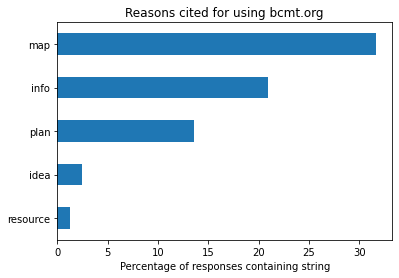

In [27]:
uses.sort_values(ascending=True).plot.barh();
plt.title("Reasons cited for using bcmt.org")
plt.xlabel("Percentage of responses containing string");

__How often do the words Google map, Windy, Navionics, Aquamaps, Tides, Current atlas, Gaia, Strava, Predict Wind, Garmin, and "No" appear in the responses for which mobile apps people use?__

In [30]:
#df["mobile apps used"].to_list()

In [31]:
strs = ["google","windy","navionics","aquamaps","tides","atlas","gaia","strava","predict wind","garmin","no","no answer provided"]

uses = pd.Series(index=strs, dtype=float)
uses.name = "percent_responses"
for str in strs:
    has_str = df["mobile apps used"].str.contains(str, case=False)
    uses[str] = 100*has_str.sum()/has_str.shape[0]
    print(f'Percentage of responses containing "{str.title()}": {np.round(100*has_str.sum()/has_str.shape[0],1)}%')

Percentage of responses containing "Google": 8.3%
Percentage of responses containing "Windy": 15.1%
Percentage of responses containing "Navionics": 13.2%
Percentage of responses containing "Aquamaps": 1.2%
Percentage of responses containing "Tides": 9.8%
Percentage of responses containing "Atlas": 0.9%
Percentage of responses containing "Gaia": 5.5%
Percentage of responses containing "Strava": 1.8%
Percentage of responses containing "Predict Wind": 1.5%
Percentage of responses containing "Garmin": 5.2%
Percentage of responses containing "No": 38.2%
Percentage of responses containing "No Answer Provided": 20.6%


In [32]:
# "title-ize" the app names
uses.index = uses.index.str.title()

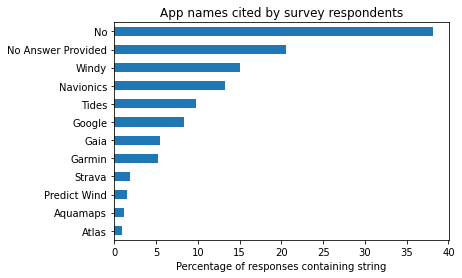

In [33]:
uses.sort_values(ascending=True).plot.barh();
plt.title("App names cited by survey respondents")
plt.xlabel("Percentage of responses containing string");

-------------------------------

## What are the characteristics of the respondents to cite “support”, “contribute“, “help” as a membership reason?  

Age group, Membership length

In [35]:
#df["membership reason"].head(10).to_list()

In [36]:
matches = ["support","contribute","help"]
matches = "|".join(matches)
matches

'support|contribute|help'

In [37]:
mask = df["membership reason"].str.contains(matches, regex=True)
mask.sum()

134

In [39]:
#df.columns

In [40]:
n_support = df.loc[mask].groupby(by=["age group","membership duration"]).count()["timestamp"].sort_values(ascending=False)
n_support.name = "number citing support"

In [41]:
n_total = df.groupby(by=["age group","membership duration"]).count()["timestamp"].sort_values(ascending=False)
n_total.name = "total number"

In [42]:
support_df = pd.concat([n_support, n_total], axis=1)

In [43]:
support_df["as_percent"] = 100*n_support/n_total

In [44]:
support_df["as_percent"] = support_df["as_percent"].round(1)

In [45]:
support_df.fillna(0, inplace=True)

In [46]:
support_df["number citing support"] = support_df["number citing support"].astype(int)

In [47]:
support_df

number citing support  \
age group       membership duration                                         
18-24 years old 1 year or less                                          1   
                2-3 years                                               0   
25-34 years old 1 year or less                                          2   
                2-3 years                                               1   
                4-5 years                                               1   
                I'm not currently a member of BCMT                      0   
35-44 years old 1 year or less                                          3   
                2-3 years                                               3   
                4-5 years                                               3   
                I'm not currently a member of BCMT                      1   
                More than 5 years                                       2   
45-54 years old 1 year or less                                          7   
                2-3 years                                               9   
                4-5 years                                               3   
                I'm not currently a member of BCMT                      0   
                More than 5 years                                       0   
55-64 years old 1 year or less                                         11   
                2-3 years                                              29   
                4-5 years                                              10   
                I'm not currently a member of BCMT                      1   
                More than 5 years                                       7   
65+ years old   1 year or less                                          4   
                2-3 years                                              18   
                4-5 years                                              11   
                I'm not currently a member of BCMT                      1   
                More than 5 years                                       5   

                                                    total number  as_percent  
age group       membership duration                                           
18-24 years old 1 year or less                                 1       100.0  
                2-3 years                                      1         0.0  
25-34 years old 1 year or less                                 3        66.7  
                2-3 years                                      1       100.0  
                4-5 years                                      1       100.0  
                I'm not currently a member of BCMT             2         0.0  
35-44 years old 1 year or less                                10        30.0  
                2-3 years                                      6        50.0  
                4-5 years                                      3       100.0  
                I'm not currently a member of BCMT             3        33.3  
                More than 5 years                              2       100.0  
45-54 years old 1 year or less                                13        53.8  
                2-3 years                                     17        52.9  
                4-5 years                                      6        50.0  
                I'm not currently a member of BCMT            10         0.0  
                More than 5 years                              1         0.0  
55-64 years old 1 year or less                                30        36.7  
                2-3 years                                     52        55.8  
                4-5 years                                     25        40.0  
                I'm not currently a member of BCMT            22         4.5  
                More than 5 years                             11        63.6  
65+ years old   1 year or less                                15        26.7  

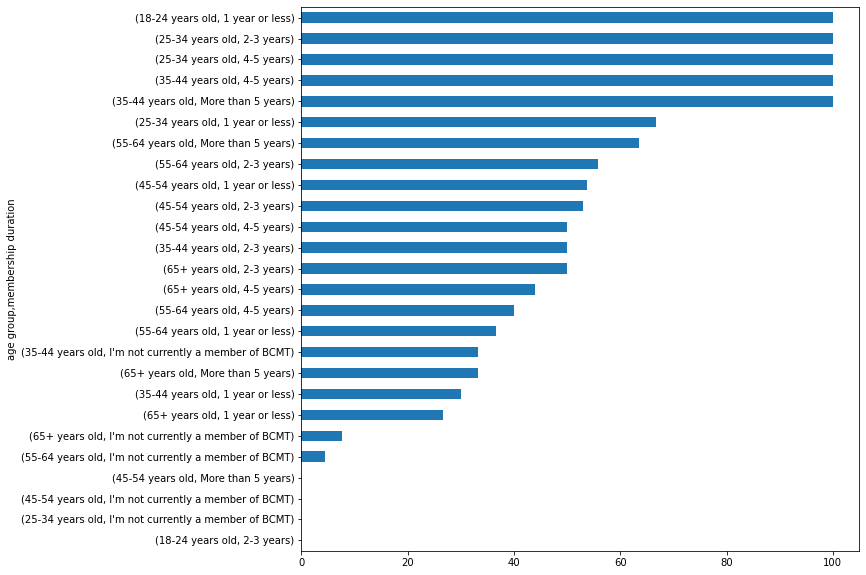

In [49]:
support_df["as_percent"].sort_values().plot.barh(figsize=(10,10));

In [50]:
support_df.groupby("age group").sum()[["number citing support","total number"]]

,number citing support,total number
age group,,
18-24 years old,1,2
25-34 years old,4,7
35-44 years old,12,24
45-54 years old,19,47
55-64 years old,58,140
65+ years old,39,104


In [51]:
support_df.groupby("membership duration").sum()[["number citing support","total number"]]

,number citing support,total number
membership duration,,
1 year or less,28,72
2-3 years,60,113
4-5 years,28,60
I'm not currently a member of BCMT,3,50
More than 5 years,14,29


In [52]:
df.loc[mask,"age group"].value_counts()/df["age group"].value_counts()

55-64 years old    0.414286
65+ years old      0.375000
45-54 years old    0.404255
35-44 years old    0.500000
25-34 years old    0.571429
18-24 years old    0.500000
Name: age group, dtype: float64

## What are the characteristics of those who mentioned using “windy”, “Navionics”, “Tides”, “No”, or “null?

Age group, years experience

In [84]:
#df["mobile apps used"]
df.columns

Index(['timestamp', 'activities', 'primary activity', 'years experience',
       'activity frequency', 'activity duration', 'group size',
       'membership duration', 'membership reason', 'have volunteered',
       'volunteer activities', 'used bcmt map', 'bcmt map frequency',
       'bcmt.org use reason', 'mobile apps used', 'submitted scr',
       'scr report frequency', 'gender', 'age group', 'location', 'email'],
      dtype='object')

In [85]:
matches = ["windy","navionics","tides"]
matches = "|".join(matches)
matches

'windy|navionics|tides'

In [98]:
matches = ["no","no answer provided"]
matches = "|".join(matches)
matches

'no|no answer provided'

In [99]:
mask = df["mobile apps used"].str.contains(matches, regex=True)
mask.sum()

124

In [100]:
n_apps = df.loc[mask].groupby(by=["age group","years experience"]).count()["timestamp"].sort_values(ascending=False)
n_apps.name = "number using apps"

In [101]:
n_total = df.groupby(by=["age group","years experience"]).count()["timestamp"].sort_values(ascending=False)
n_total.name = "total number"

In [102]:
apps_df = pd.concat([n_apps, n_total], axis=1)

In [103]:
apps_df["as_percent"] = 100*n_apps/n_total

In [104]:
apps_df["as_percent"] = apps_df["as_percent"].round(1)

In [105]:
apps_df.fillna(0, inplace=True)

In [106]:
apps_df["number using apps"] = apps_df["number using apps"].astype(int)

In [107]:
apps_df

number using apps  total number  as_percent
age group       years experience                                             
18-24 years old 5-8 years                         1             1       100.0
                less than 1 year                  1             1       100.0
25-34 years old 1-2 years                         0             3         0.0
                5-8 years                         0             2         0.0
                9+ years                          1             1       100.0
                less than 1 year                  1             1       100.0
35-44 years old 1-2 years                         0             4         0.0
                3-4 years                         3             4        75.0
                5-8 years                         3             8        37.5
                9+ years                          3             8        37.5
45-54 years old 1-2 years                         0             3         0.0
                3-4 years                         0             9         0.0
                5-8 years                         0             9         0.0
                9+ years                         11            25        44.0
                less than 1 year                  1             1       100.0
55-64 years old 1-2 years                         1             2        50.0
                3-4 years                         4            14        28.6
                5-8 years                         7            14        50.0
                9+ years                         48           109        44.0
                less than 1 year                  0             1         0.0
65+ years old   1-2 years                         1             1       100.0
                3-4 years                         1             7        14.3
                5-8 years                         2            12        16.7
                9+ years                         35            84        41.7

In [53]:
# columns to explore
columns = ["age group","gender","membership duration","years experience","have volunteered"]

In [54]:
# counts the occurrences of various quantities for those who cite support 
# as their reason to join the BCMT
#for column in columns[0]:
df_age_counts = df_support[columns[1]].value_counts()
df_age_counts.name = "total number"
df_age_counts

NameError: name 'df_support' is not defined

In [55]:
# counts the occurrences of various quantities for those who cite support 
# as their reason to join the BCMT
for column in columns:
    print(df_support[column].value_counts(), end=2*"\n")

NameError: name 'df_support' is not defined

In [ ]:
# counts the occurrences of various quantities for everyone in the survey
for column in columns:
    print(df[column].value_counts(), end=2*"\n")

In [ ]:
# the percentage of respondents cite support relative to all respondents, who cite support 
# as their reason to join the BCMT
for column in columns:
    tdf = df_support[column].value_counts()/df[column].value_counts()
    print(100*tdf.sort_values(ascending=False).round(2), end=2*"\n")